This notebook will help you to understand how you can find the optimal value of K for K-Means algorithm and will you give you basic understanding by walking you through a simple example.

In [18]:
# Imports
from sklearn.datasets import make_blobs                  # for generating clustering dataset
from sklearn.cluster import KMeans, AffinityPropagation  # importing clustering algorithms
import pandas as pd                                      # for creating dataframes
import seaborn as sns                            # for plotting data
import matplotlib.pyplot as plt

# Yellowbrick Visualizers to plot evaluation curves 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

In [2]:
# Generate synthetic dataset with 10 random clusters in 2 dimensional space
X, y = make_blobs(n_samples=1000, n_features=2, centers=10, random_state=42)

In [3]:
# Creating dataframe for our features
data = pd.DataFrame(X, columns=['feature1','feature2'])

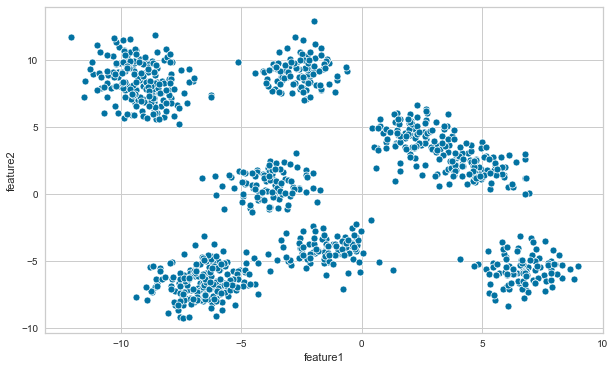

In [4]:
# Creating a scatter plot using seaborn
# Although, we used 10 centers but the plot below shows overlap between some clusters
# We have only 7-8 separable clusters
fig = plt.figure (figsize=(10,6))
sns.scatterplot(x='feature1', y='feature2', data=data)

# Plotting Elbow Curve

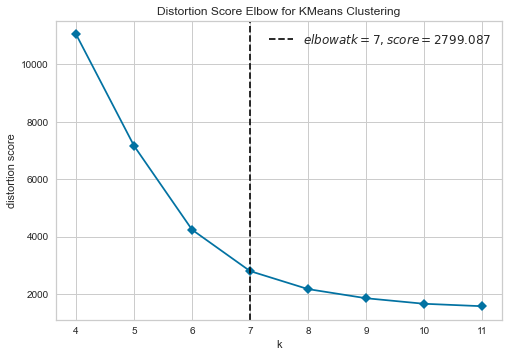

In [5]:
# Using Yellowbrick to generate Elbow curve
# Instantiate the clustering model and visualizer
# this shows after 7-8 clusters, the value of adding clusters is not much
# this verified to what we have seen in scatter plot
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Plotting Silhouette curves

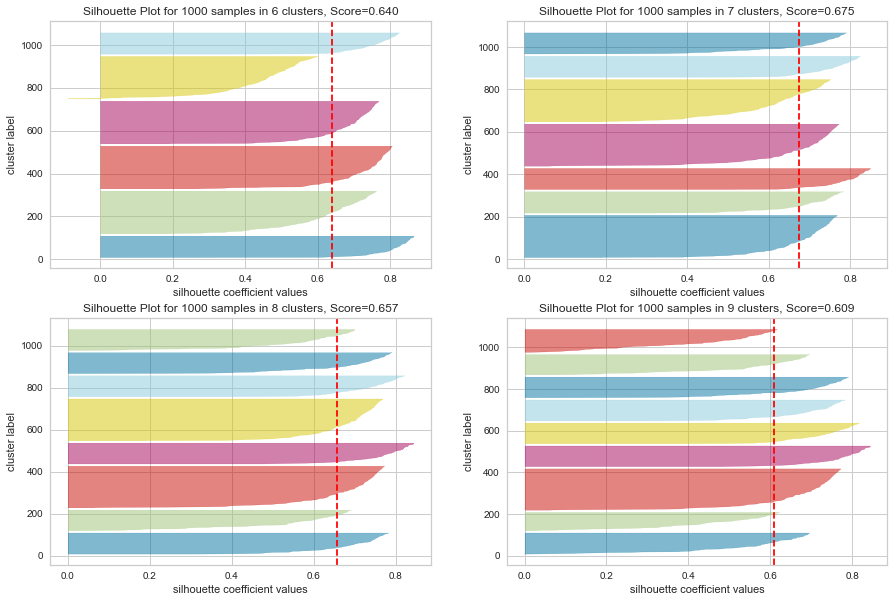

In [6]:
# We need to create 4 plots for numnber_of_clusters 6,10
fig, axes = plt.subplots(2, 2, figsize=(15,10))
axes_flat = axes.flatten()                     # Flatted the axes to iterate
i=0
for k in range(6,10,1):
    model = KMeans(k, random_state=42)
    # Select the current axis
    ax=axes_flat[i]   
    # Creating SilhouetteVisualizer and assigning it to an axis
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=axes_flat[i])
    visualizer.fit(X)
    # Setting subplot title via axis
    ax.set_title(f'Silhouette Plot for 1000 samples in {k} clusters, Score={visualizer.silhouette_score_:.3f}')
    # Setting subplot x and y labels
    ax.set(xlabel='silhouette coefficient values', ylabel='cluster label')
    # Going to the next axis (subplot)
    i=i+1

plt.show()

# Intercluster Distance Maps

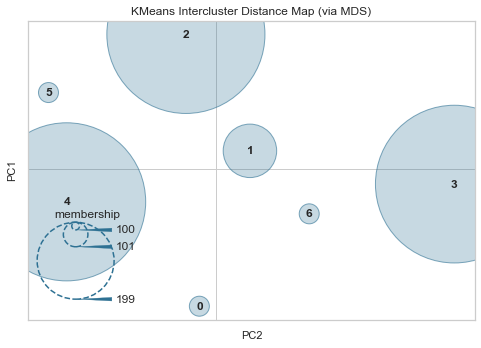

In [7]:
# Creating intercluster distance map for 7 clusters
# using default embedding MDS
model = KMeans(7)
visualizer = InterclusterDistance(model, random_state=0)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

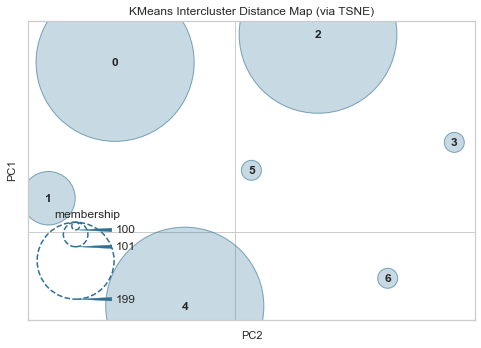

In [8]:
# Creating intercluster distance map for 7 clusters
# using TSNE embedding
model = KMeans(7)
visualizer = InterclusterDistance(model, embedding='tsne', random_state=0)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Using Different Algorithms to find K

In [9]:
affinity_propagation = AffinityPropagation(random_state=None, damping=0.90)

In [10]:
affinity_propagation.fit(X)

AffinityPropagation(damping=0.9, random_state=None)

In [11]:
# number of clusters found by Affinity propagation
len(affinity_propagation.cluster_centers_indices_)

10

# Final Result

finally we found that optimal value of number of clusters using different methods in 7-8. Lets use K=7 and see how our model clustered the dataset

In [12]:
model = KMeans(n_clusters=7)

In [13]:
# fit X
model.fit(X)

KMeans(n_clusters=7)

In [14]:
# predict labels 
data['y_pred'] = model.predict(X)

In [15]:
# converting the output column to category
data['y_pred'] = data['y_pred'].astype('category')

In [16]:
import seaborn as sns

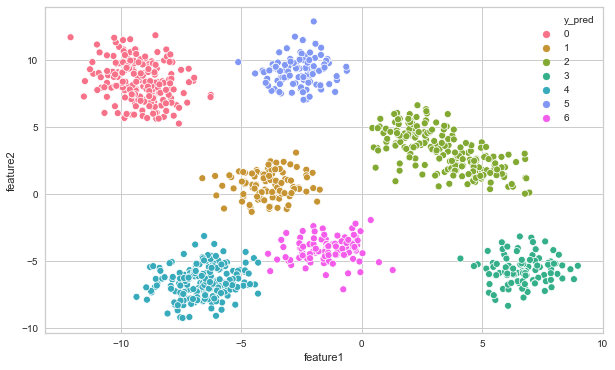

In [17]:
# plotting using seaborn
# perfectly clusterd data
fig = plt.figure (figsize=(10,6))
sns.scatterplot(x='feature1', y='feature2', hue='y_pred', data=data)